## Modifying The Database Little Bit for Better Approaching

###  Previous Before Modification :
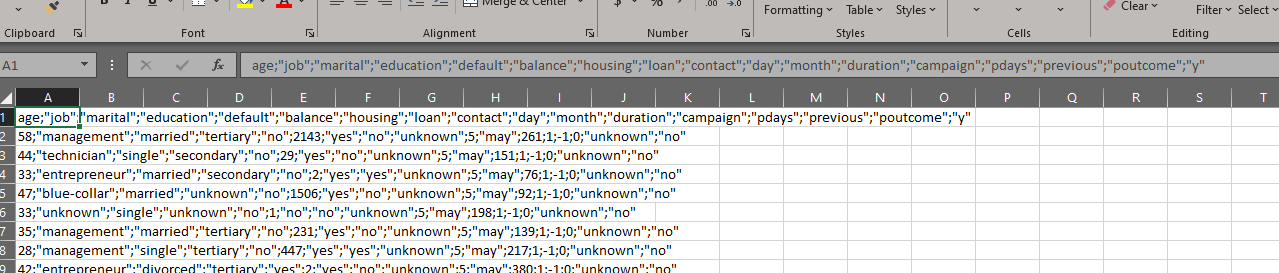

### Spliting The Columns using this apporach: 

- Select the column containing the data.
- Go to the "Data" tab.
- Click on "Text to Columns."
- Choose "Delimited" and click "Next."
- Select "Semicolon" as the delimiter and click "Finish."

### After Modification
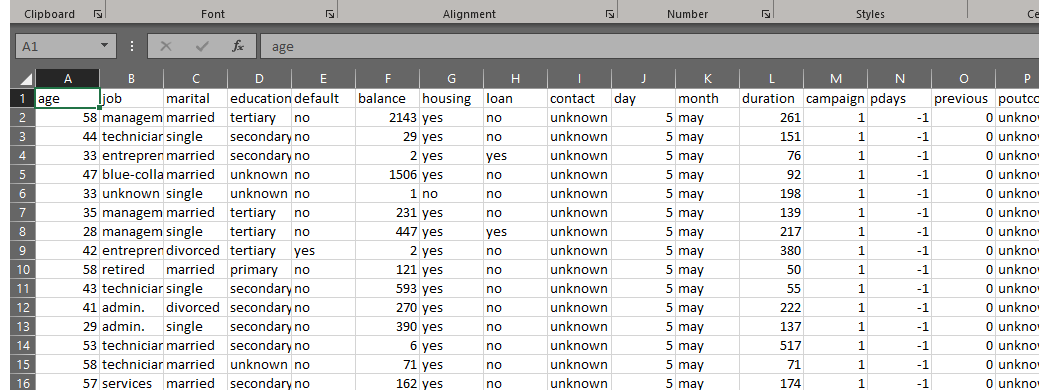

### For Better Understanding : Changing the Column Name 'y' to 'deposit'

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing # Importing scikit-learn's preprocessing module for data preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression model from scikit-learn
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the dataset
import seaborn as sns # Importing Seaborn for statistical data visualization
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading and Inspecting Bank Data: Dimensions and Column Names
data = pd.read_csv("./bank-full.csv")
print(data.shape)
print(list(data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [3]:
#Previewing the First Few Rows of Bank Data
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [4]:
#Job Distribution Analysis in Bank Data
data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

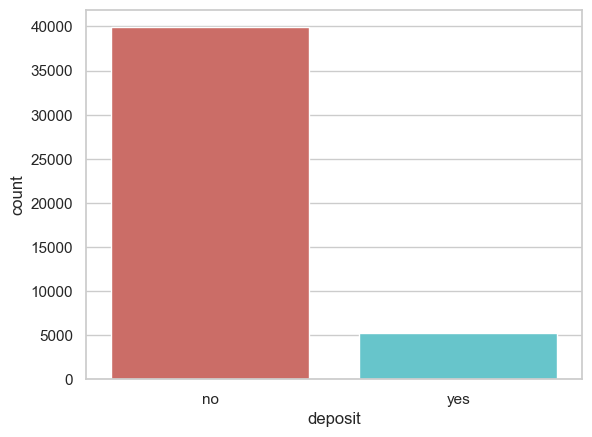

In [5]:
#Visualizing Deposit Distribution in Bank Data
sns.countplot(x = 'deposit',data=data, palette='hls')
plt.show()

In [6]:
#Subscription Percentage Analysis in Bank Data
count_no_sub = len(data[data['deposit']=='no'])
count_sub = len(data[data['deposit']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)


percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


In [7]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [8]:
#One-Hot Encoding Categorical Variables in Bank Data
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [9]:
#Finalized Features in Processed Bank Data
data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [10]:
#Defining Target and Feature Variables in Bank Data
data_final_vars=data_final.columns.values.tolist()
y=['deposit']
X=[i for i in data_final_vars if i not in y]

In [11]:
#Separating Target and Feature Variables in Bank Data
y = data['deposit']
X = data_final[X]

In [12]:
y.value_counts()

deposit
no     39922
yes     5289
Name: count, dtype: int64

In [13]:
#Checking Dimensions of Feature and Target Variables in Bank Data
X.shape, y.shape

((45211, 51), (45211,))

In [14]:
#Converting Binary Target Variable in Bank Data
y = y.apply(lambda x: 1 if x=="yes" else 0)

In [15]:
#Splitting Bank Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
#Importing Libraries for Recursive Feature Elimination and Logistic Regression in Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [17]:
#Feature Selection using Recursive Feature Elimination with Logistic Regression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True False False
  True False False  True False False False False  True False  True  True
 False False False False  True  True False  True  True  True  True  True
  True  True  True False False  True  True  True False  True  True  True
  True  True  True]
[3 4 3 4 3 4 3 3 2 1 4 4 1 4 2 1 3 4 4 3 1 3 1 1 3 4 2 2 1 1 3 1 1 1 1 1 1
 1 1 4 2 1 1 1 2 1 1 1 1 1 1]


In [18]:
#Selected Features after Recursive Feature Elimination
cols = X.columns[rfe.support_]

In [19]:
X=data_final[cols]

In [20]:
#Training Logistic Regression Model on Selected Features in Bank Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
#Model Evaluation: Logistic Regression Accuracy on Test Set
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [22]:
#Confusion Matrix for Logistic Regression Model on Test Set
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7874  130]
 [ 845  194]]


In [23]:
#Classification Report for Logistic Regression Model on Test Set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8004
           1       0.60      0.19      0.28      1039

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.61      9043
weighted avg       0.87      0.89      0.87      9043



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8921817980758597
Precision: 0.5987654320987654
Recall: 0.1867179980750722
F1-score: 0.2846661775495231
Confusion Matrix:
 [[7874  130]
 [ 845  194]]


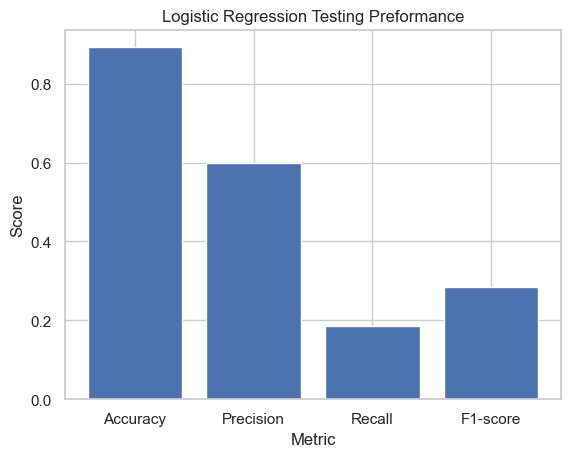

In [25]:
metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.bar(labels, metrics)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Logistic Regression Testing Preformance")
plt.show()


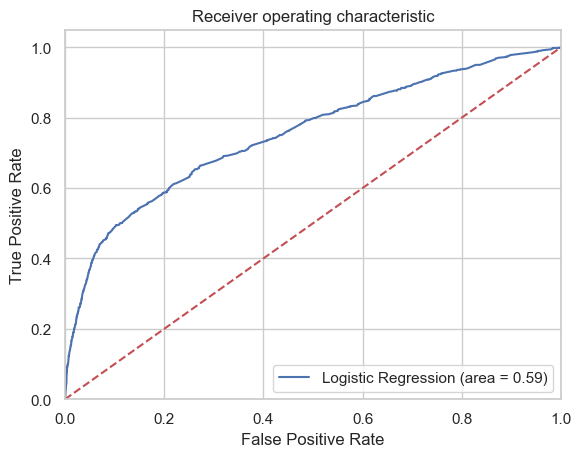

In [26]:
#Receiver Operating Characteristic (ROC) Curve for Logistic Regression Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()